**Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Importing The Train Data**

In [2]:
train=pd.read_csv('../input/ventilator-pressure-prediction/train.csv')
train.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


**Viewing information, shape, description and null values in the data**

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
 7   pressure   float64
dtypes: float64(3), int64(5)
memory usage: 368.4 MB


In [4]:
train.shape

(6036000, 8)

In [5]:
train.describe()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,3.018000e+06,6.283886e+04,2.703618e+01,2.608072e+01,1.307225e+00,7.321615e+00,6.204493e-01,1.122041e+01
std,1.742443e+06,3.633526e+04,1.959549e+01,1.715231e+01,7.659778e-01,1.343470e+01,4.852752e-01,8.109703e+00
min,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.895744e+00
25%,1.509001e+06,3.137700e+04,5.000000e+00,1.000000e+01,6.428995e-01,3.936623e-01,0.000000e+00,6.329607e+00
50%,3.018000e+06,6.276550e+04,2.000000e+01,2.000000e+01,1.308123e+00,4.386146e+00,1.000000e+00,7.032628e+00
75%,4.527000e+06,9.430100e+04,5.000000e+01,5.000000e+01,1.965502e+00,4.983895e+00,1.000000e+00,1.364103e+01
max,6.036000e+06,1.257490e+05,5.000000e+01,5.000000e+01,2.937238e+00,1.000000e+02,1.000000e+00,6.482099e+01


In [6]:
train.isnull().sum()

id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64

**Viewing distribution of data by plotting graphs for each column**

<AxesSubplot:xlabel='R', ylabel='count'>

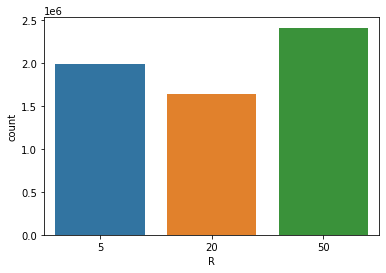

In [7]:
sns.countplot(train['R'])

<AxesSubplot:xlabel='C', ylabel='count'>

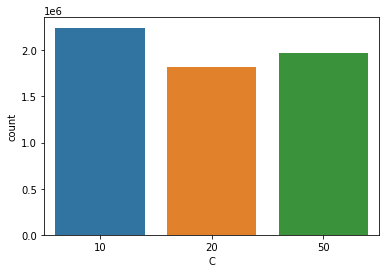

In [8]:
sns.countplot(train['C'])

(array([713295., 678370., 652021., 676258., 671213., 673054., 659160.,
        688140., 544888.,  79601.]),
 array([0.        , 0.2937238 , 0.5874476 , 0.88117139, 1.17489519,
        1.46861899, 1.76234279, 2.05606658, 2.34979038, 2.64351418,
        2.93723798]),
 <BarContainer object of 10 artists>)

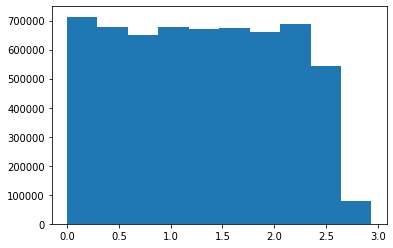

In [9]:
plt.hist(train['time_step'])

(array([5079900.,  422853.,  188859.,  114424.,   75804.,   46195.,
          35160.,   26691.,   14932.,   31182.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

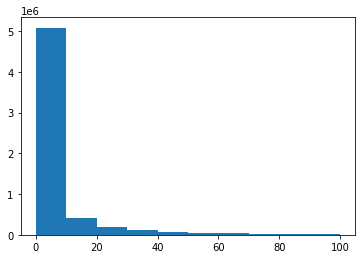

In [10]:
plt.hist(train['u_in'])

<AxesSubplot:xlabel='u_out', ylabel='count'>

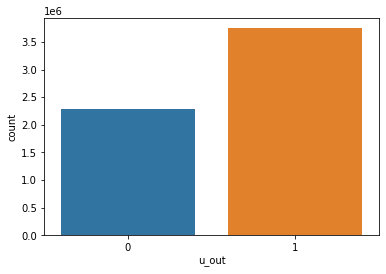

In [11]:
sns.countplot(train['u_out'])

(array([1.504040e+05, 4.133107e+06, 6.762010e+05, 4.967310e+05,
        3.656900e+05, 1.638900e+05, 3.459900e+04, 1.002400e+04,
        3.101000e+03, 2.253000e+03]),
 array([-1.89574429,  4.77592931, 11.44760291, 18.11927652, 24.79095012,
        31.46262372, 38.13429733, 44.80597093, 51.47764453, 58.14931814,
        64.82099174]),
 <BarContainer object of 10 artists>)

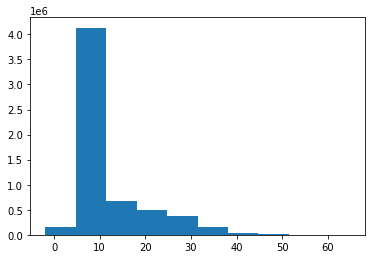

In [12]:
plt.hist(train['pressure'])

**Viewing relationship of independent variables with the target variables by plotting graphs**

<AxesSubplot:xlabel='R', ylabel='pressure'>

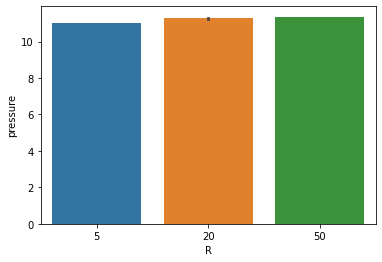

In [13]:
sns.barplot(x='R',y='pressure',data=train)

<AxesSubplot:xlabel='C', ylabel='pressure'>

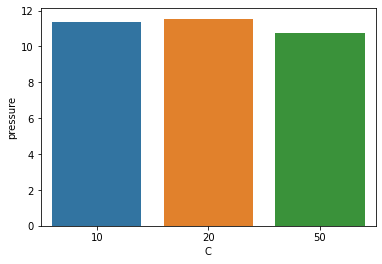

In [14]:
sns.barplot(x='C',y='pressure',data=train)

<AxesSubplot:xlabel='pressure', ylabel='time_step'>

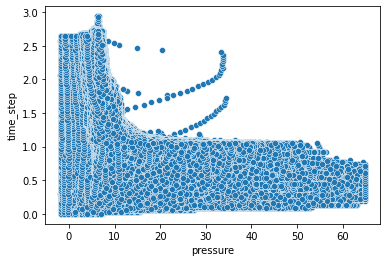

In [15]:
sns.scatterplot(y='time_step',x='pressure',data=train)

<AxesSubplot:xlabel='pressure', ylabel='u_in'>

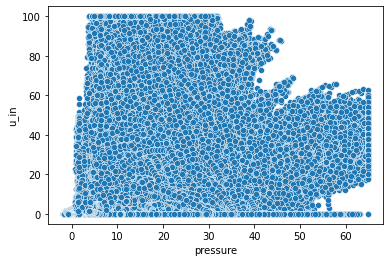

In [16]:
sns.scatterplot(x='pressure',y='u_in',data=train)

<AxesSubplot:xlabel='u_out', ylabel='pressure'>

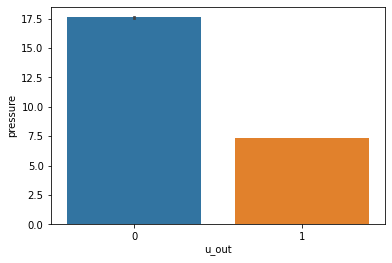

In [17]:
sns.barplot(x='u_out',y='pressure',data=train)

**Splitting the dataset into independent and dependent variables**

In [18]:
x=train.drop(['id','breath_id','pressure'],axis=1) #Columns 'id' and 'breath_id are also dropped because they are the unique identifications of each record. Therefore they will not be considered for prediction modelling'
y=train['pressure']

**Standard Scaling the independent variables for bringing all the column values in the same scale**

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [20]:
x=sc.fit_transform(x)
x

array([[-0.35907157,  1.39452239, -1.70660944, -0.53877502, -1.27855158],
       [-0.35907157,  1.39452239, -1.66267565,  0.82334751, -1.27855158],
       [-0.35907157,  1.39452239, -1.61846795,  1.13048025, -1.27855158],
       ...,
       [ 1.17189304, -0.93752463,  1.65041698, -0.42893677,  0.78213504],
       [ 1.17189304, -0.93752463,  1.69393897, -0.45024835,  0.78213504],
       [ 1.17189304, -0.93752463,  1.73737754, -0.43461153,  0.78213504]])

**Splitting the datasets further into train and test**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=123)

**Building, Training and Predicting the dataset through Linear Regression Model**

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [24]:
lrmodel=lr.fit(xtrain,ytrain)

In [25]:
ypred_lr=lrmodel.predict(xtest)
ypred_lr

array([17.28766836,  7.85701149, 16.97830552, ...,  7.16157834,
       20.8317839 ,  7.58324226])

**Checking RMSE and R-Square values for estimating the accuracy of Linear Regression model**

In [26]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [27]:
rmse_lr=np.sqrt(mean_squared_error(ytest,ypred_lr))
rmse_lr

6.3823468043835145

In [28]:
r2_lr=r2_score(ytest,ypred_lr)
r2_lr

0.3832091256430694

**Building, Training and Predicting the dataset through Decision Tree Regression Model**

In [29]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [30]:
dtrmodel=dtr.fit(xtrain,ytrain)

In [31]:
ypred_dtr=dtrmodel.predict(xtest)
ypred_dtr

array([21.51487014,  7.10293032, 10.54773545, ...,  6.39990887,
       20.81184869,  6.54051316])

**Checking RMSE and R-Square values for estimating the accuracy of Decision Tree Regression model**

In [32]:
rmse_dtr=np.sqrt(mean_squared_error(ytest,ypred_dtr))
rmse_dtr

5.1124019445978135

In [33]:
r2_dtr=r2_score(ytest,ypred_dtr)
r2_dtr

0.6042443499443712

**Building, Training and Predicting the dataset through Extreme Gradient Boosting Model**

In [34]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators=300,learning_rate=0.05)

In [35]:
xgbmodel=xgb.fit(xtrain,ytrain)

In [36]:
ypred_xgb=xgbmodel.predict(xtest)
ypred_xgb

array([21.477962 ,  6.2531853, 14.825329 , ...,  6.186532 , 20.042517 ,
        6.8293033], dtype=float32)

**Checking RMSE and R-Square values for estimating the accuracy of Extreme Gradient Boosting Regression model**

In [37]:
rmse_xgb=np.sqrt(mean_squared_error(ytest,ypred_xgb))
rmse_xgb

4.170470497271326

In [38]:
r2_xgb=r2_score(ytest,ypred_xgb)
r2_xgb

0.7366415559873463

**Building, Training and Predicting the dataset through Gradient Boosting Regression Model**

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [40]:
gbrmodel=gbr.fit(xtrain,ytrain)

In [41]:
ypred_gbr=gbrmodel.predict(xtest)
ypred_gbr

array([16.77690384,  5.45966288, 16.62826737, ...,  6.317407  ,
       16.08529915,  6.80694455])

**Checking RMSE and R-Square values for estimating the accuracy of Gradient Boosting Regression model**

In [42]:
rmse_gbr=np.sqrt(mean_squared_error(ytest,ypred_gbr))
rmse_gbr

4.419121065344091

In [43]:
r2_gbr=r2_score(ytest,ypred_gbr)
r2_gbr

0.7043016233930706

**Building, Training and Predicting the dataset through Ada-Boost Regression Model**

In [44]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()

In [45]:
abrmodel=abr.fit(xtrain,ytrain)

In [46]:
ypred_abr=abrmodel.predict(xtest)
ypred_abr

array([22.29312516,  6.39788037, 18.25501869, ...,  6.68514514,
       18.97773292,  6.68514514])

**Checking RMSE and R-Square values for estimating the accuracy of Ada-Boost Regression model**

In [47]:
rmse_abr=np.sqrt(mean_squared_error(ytest,ypred_abr))
rmse_abr

5.533597291891993

In [48]:
r2_abr=r2_score(ytest,ypred_abr)
r2_abr

0.5363478891005491

**Making a dataframe for showing the RMSE and R-Squared values of all the models for comparison**

In [49]:
comparison_df=pd.DataFrame({'Regression Models':['Linear Regression Model','Decision Tree Regression Model',
                                                 'Extreme Gradient Boosting Regression Model','Gradient Boosting Regression Model',
                                                 'Ada-Boost Regression Model'],
                           'R-Square':[r2_lr,r2_dtr,r2_xgb,r2_gbr,r2_abr],
                           'RMSE':[rmse_lr,rmse_dtr,rmse_xgb,rmse_gbr,rmse_abr]})
comparison_df.sort_values('R-Square',ascending=False)

,Regression Models,R-Square,RMSE
2,Extreme Gradient Boosting Regression Model,0.736642,4.170470
3,Gradient Boosting Regression Model,0.704302,4.419121
1,Decision Tree Regression Model,0.604244,5.112402
4,Ada-Boost Regression Model,0.536348,5.533597
0,Linear Regression Model,0.383209,6.382347


**From the above comparison dataframe, we can conclude that the Extreme Gradient Boosting Regression Model is giving the best results. Hence, this model will be used on the unseen data for predicting the values of pressure**

In [50]:
test=pd.read_csv('../input/ventilator-pressure-prediction/test.csv')
test

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0
...,...,...,...,...,...,...,...
4023995,4023996,125748,20,10,2.530117,4.971245,1
4023996,4023997,125748,20,10,2.563853,4.975709,1
4023997,4023998,125748,20,10,2.597475,4.979468,1
4023998,4023999,125748,20,10,2.631134,4.982648,1


In [51]:
test.drop(['id','breath_id'],axis=1,inplace=True)

**Standard Scaling the Test Dataset**

In [52]:
test=sc.transform(test)
test

array([[-1.12455387, -0.35451287, -1.70660944, -0.54497791, -1.27855158],
       [-1.12455387, -0.35451287, -1.66495843,  0.01439785, -1.27855158],
       [-1.12455387, -0.35451287, -1.62328159,  0.54560658, -1.27855158],
       ...,
       [-0.35907157, -0.93752463,  1.68444833, -0.17433565,  0.78213504],
       [-0.35907157, -0.93752463,  1.72839052, -0.17409892,  0.78213504],
       [-0.35907157, -0.93752463,  1.77299663, -0.17389609,  0.78213504]])

**Getting Predictions**

In [53]:
predictions=xgbmodel.predict(test)
predictions

array([5.6225953, 5.8878856, 6.1735115, ..., 6.0758944, 6.0758944,
       6.0758944], dtype=float32)